#  Gaussian vectors and linear regression

The linear regression of random variables $Y$ knowing the value $x$ taken by a variable $X$ is given by the line with equation
$$
y = \mathbb{E}[Y] + \dfrac{\mathbb{E}[XY]-\mathbb{E}[X]\mathbb{E}[Y]}{\mathbb{E}[X^2]-(\mathbb{E}[X])^2}(x-\mathbb{E}[X])=ax+b
$$
In practice, the coefficients $a$ and $b$ are often unknow and are estimated from observations. If we observe $(x_i,y_i)_{i=1:N}$, we estimate the parameters of interest as follows:
$$
\begin{array}{l}
\mathbb{E}[X] &\rightarrow m_X = \frac 1 N\sum x_i \\
\mathbb{E}[Y] &\rightarrow m_Y = \frac 1 N\sum y_i \\
\mathbb{E}[X^2] &\rightarrow m_{XX} = \frac 1 N\sum x_i^2 \\
\mathbb{E}[XY] &\rightarrow m_{XY} = \frac 1 N\sum x_iy_i, \\
\end{array}
$$
that is, $a\rightarrow a_{est}=\frac{m_{XY}-m_Xm_Y}{m_{XX}-m_X^2}$ and $b\rightarrow b_{est}=m_Y-a_{est}m_X$.

>- 1 - Generate randomly the parameters of a line of the plane $y=\alpha x+\beta $ with $\alpha=\tan(\theta)$ and $\theta\sim U_{[0,\pi/2]}$ and $\beta\sim U_{[0,2]}$, where $U_A$ denotes the uniform distribution over the set $A$. 
>- 2- We observe data pairs $(x_i,y_i)$ so that $x_i\sim \mathcal{N}(0,5)$ and conditional to $x_i$ the distribution of $y_i$ is $\mathcal{N}(\alpha x_i+\beta,2)$, where $\mathcal{N}(\mu,\sigma^2)$ denotes the Gaussian distribution with mean $\mu$ and variance $\sigma^2$.
Generate $N=100$ relizations $(x_i,y_i)_{i=0,\ldots, N-1}$ and plot the data pairs. 
>- 3 -Implement a function **linear_regression** that returns the estimated linear regression function from a set of observed pairs $(x_i,y_i)_{i=0,\ldots, N-1}$. 
>- 4- Calculate the estimated linear regression line $y=a_{est}x+b_{est}$ and plot it. Compare it to line $y=\alpha x+\beta$ that was used to generate data. What happens when the number $N$ of observed pairs increases or decreases ?

the parameters generated randomly for the line : 
𝛼 : 0.32552295162926115 𝛽 : 0.3373825442642737
the estimated linear regression line : 
a : 0.3580584748610057 b: 0.056575008588459465


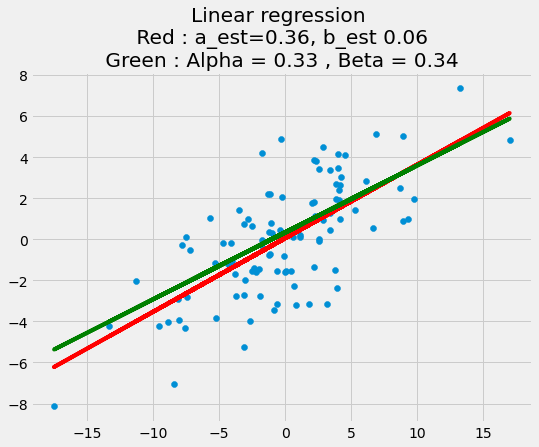

For N :20 𝛼-a = 0.026071459231080008 𝛽 - b= -0.4400162342754468
For N :50 𝛼-a = 0.0011621352000457108 𝛽 - b= 0.16944035310693195
For N :100 𝛼-a = -0.01814334137246476 𝛽 - b= 0.17385668359471262
For N :200 𝛼-a = -0.0071704203628524255 𝛽 - b= 0.015512274036469043
For N :300 𝛼-a = 0.007062583185439675 𝛽 - b= 0.022234986266158163
For N :400 𝛼-a = -0.011502211091848125 𝛽 - b= 0.1252426585503803
For N :500 𝛼-a = -0.010206774097065663 𝛽 - b= 0.0018010985928669232
For N :600 𝛼-a = 0.02016968553010834 𝛽 - b= -0.07506128950625768
For N :1000 𝛼-a = -0.0055209528919835105 𝛽 - b= 0.07051988525510389
For N :2000 𝛼-a = -0.0009847107239429054 𝛽 - b= 0.019288465137630273
For N :3000 𝛼-a = -0.009971943813863238 𝛽 - b= 0.02956944081952284


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
#from scipy.stats import expon
#import inspect
from matplotlib.pyplot import figure
plt.style.use("fivethirtyeight")

#Question 1:
def paramGen():
    𝜃=np.random.uniform(0,math.pi/2)
    𝛽=np.random.uniform(0,2)
    return math.tan(𝜃),𝛽

#Question 2:
def xyGen(N,m,v,a,b):
    X=[]
    Y=[]
    for i in range(0,N):
        X.append(np.random.normal(m,v))
    for x in X:
        Y.append(np.random.normal(a*x+b,2))
    return X,Y

#For the question 3
def Esp(X,Y=1):
    if Y != 1:
        e=0
        a= len(X) # la longueur de la liste
        for i in range(a):
            e = e + X[i]*Y[i] # somme des pi*xi
        return e/len(X)
    else :
        return sum(X)/len(X)

#Question 3
def linearReg(X,Y):
    Aest =(Esp(X,Y)-(Esp(X)*Esp(Y)))/(Esp(X,X)-(Esp(X)**2))
    Best =Esp(Y)-(Aest*Esp(X))
    return Aest,Best

#Question 4
def plotReg(X,Y,Aest,Best):
    plt.scatter(X, Y)
    Yx=[]
    for i in range(len(X)):
        Yx.append(X[i]*Aest + Best)
    plt.plot(X,Yx,color='red')
    
#Question 4
def plotRegAlphaBeta(X,a,b):
    Yx=[]
    for i in range(len(X)):
        Yx.append(X[i]*a + b)
    plt.plot(X,Yx,color='green')


#RUN TESTS 
a,b=paramGen()
print('the parameters generated randomly for the line : \n𝛼 : ' + str(a) +' 𝛽 : ' + str(b))
#X=xGen(50,0,5)
#Y=yGen(X,a,b)
X,Y=xyGen(100,0,5,a,b)
Aest,Best=linearReg(X,Y)    
figure(figsize=(8, 6))
print('the estimated linear regression line : \na : ' + str(Aest) + " b: " + str(Best))
plt.title(f'Linear regression \n Red : a_est={round(Aest,2)}, b_est {round(Best,2)} \n Green : Alpha = {round(a,2)} , Beta = {round(b,2)} ')
plotReg(X,Y,Aest,Best)
plotRegAlphaBeta(X,a,b)
plt.show()


#We observe that when N increases the lines becomes more and more superimposed, Aest is getting closer to Alpha, and the same thing for Best and Beta, and vice versa

for i in [20,50,100,200,300,400,500,600,1000,2000,3000]:
    a,b=paramGen()
    X,Y=xyGen(i,0,5,a,b)
    Aest,Best=linearReg(X,Y)
    difa=a-Aest
    difb=b-Best
    print("For N :" + str(i) + " 𝛼-a = " + str(difa) + " 𝛽 - b= " + str(difb))


#For comparison with polyfit
#AA, BB = np.polyfit(X,Y, 1)
#print('the estimated linear regression line : \na : ' + str(AA) + " b: " + str(BB))
#Yxx=[]
#for i in range(len(X)):
#    Yxx.append(X[i]*AA + BB+0.8)
#plt.plot(X,Yxx,color='green')